#  📌Introduction et description des données

# ETH Forcasting

- Title : Ethereum Historical Dataset,
- Year : 8-August-2015 to 11-December-2024,
- Data source : https://coinmarketcap.com/currencies/ethereum/historical-data/

**About each column**
- **Open:** The opening price of Ethereum at the start of a particular time period (e.g., day, week, month). This column tells you the price level at which the market opened for trading at the start of the time period in question.

- **High:** The highest price of Ethereum during the time period. This column tells you the highest price level reached by Ethereum during the time period.

- **Low:** The lowest price of Ethereum during the time period. This column tells you the lowest price level reached by Ethereum during the time period.

- **Close:** The closing price of Ethereum at the end of the time period. This column tells you the price level at which the market closed for trading at the end of the time period in question.

- **Volume:** The total volume of Ethereum traded during the time period. This column tells you how much Ethereum was bought and sold during the time period.

#  📌Chargement des bibliothèques et des données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('Ethereum_historical_data_coinmarketcap.xlsx', header=0)
df

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2024-12-11T00:00:00.000Z,2024-12-11T23:59:59.999Z,2024-12-11T23:10:00.000Z,2024-12-11T02:04:00.000Z,2781,3631.276170,3850.765448,3567.566496,3832.822048,3.596805e+10,4.616859e+11,2024-12-11T23:59:59.999Z
1,2024-12-10T00:00:00.000Z,2024-12-10T23:59:59.999Z,2024-12-10T00:49:00.000Z,2024-12-10T18:13:00.000Z,2781,3719.000477,3780.753521,3520.365193,3631.833630,5.841642e+10,4.373689e+11,2024-12-10T23:59:59.999Z
2,2024-12-09T00:00:00.000Z,2024-12-09T23:59:59.999Z,2024-12-09T00:01:00.000Z,2024-12-09T21:06:00.000Z,2781,4006.101685,4008.777854,3525.232876,3718.690456,5.702983e+10,4.479358e+11,2024-12-09T23:59:59.999Z
3,2024-12-08T00:00:00.000Z,2024-12-08T23:59:59.999Z,2024-12-08T23:57:00.000Z,2024-12-08T09:57:00.000Z,2781,4007.690582,4018.000120,3927.853932,4005.704576,2.094338e+10,4.825096e+11,2024-12-08T23:59:59.999Z
4,2024-12-07T00:00:00.000Z,2024-12-07T23:59:59.999Z,2024-12-07T00:35:00.000Z,2024-12-07T07:09:00.000Z,2781,4006.028689,4029.452823,3974.176225,4002.692701,2.257464e+10,4.820898e+11,2024-12-07T23:59:59.999Z
...,...,...,...,...,...,...,...,...,...,...,...,...
3409,2015-08-12T00:00:00.000Z,2015-08-12T23:59:59.999Z,2015-08-12T21:34:29.000Z,2015-08-12T03:49:30.000Z,2781,1.058750,1.289940,0.883608,1.217440,2.150620e+06,7.364501e+07,2015-08-12T23:59:59.999Z
3410,2015-08-11T00:00:00.000Z,2015-08-11T23:59:59.999Z,2015-08-11T20:39:29.000Z,2015-08-11T06:29:29.000Z,2781,0.708087,1.131410,0.663235,1.067860,1.463100e+06,6.456929e+07,2015-08-11T23:59:59.999Z
3411,2015-08-10T00:00:00.000Z,2015-08-10T23:59:59.999Z,2015-08-10T18:54:31.000Z,2015-08-10T07:34:32.000Z,2781,0.713989,0.729854,0.636546,0.708448,4.052830e+05,4.281836e+07,2015-08-10T23:59:59.999Z
3412,2015-08-09T00:00:00.000Z,2015-08-09T23:59:59.999Z,2015-08-09T06:44:29.000Z,2015-08-09T01:49:30.000Z,2781,0.706136,0.879810,0.629191,0.701897,5.321700e+05,4.239957e+07,2015-08-09T23:59:59.999Z


#  📌Préparation des données

In [5]:
df.drop(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name'], axis = 1, inplace = True)

In [7]:
df = df.iloc[::-1].reset_index(drop=True)

In [9]:
df.rename(columns={'timestamp': 'Date'}, inplace=True)

In [11]:
df['Date'] = df['Date'].str.split('T').str[0]

In [13]:
df['timestamp'] = df['Date']

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [17]:
df['month'] = [df.index[i].month for i in range(len(df))]
df['Day'] = [df.index[i].day for i in range(len(df))]
df['Day_Of_Week'] = [df.index[i].dayofweek for i in range(len(df))]

In [19]:
df

,open,high,low,close,volume,marketCap,timestamp,month,Day,Day_Of_Week
Date,,,,,,,,,,
2015-08-08,2.793760,2.798810,0.714725,0.753325,6.741880e+05,4.548689e+07,2015-08-08,8,8,5
2015-08-09,0.706136,0.879810,0.629191,0.701897,5.321700e+05,4.239957e+07,2015-08-09,8,9,6
2015-08-10,0.713989,0.729854,0.636546,0.708448,4.052830e+05,4.281836e+07,2015-08-10,8,10,0
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.463100e+06,6.456929e+07,2015-08-11,8,11,1
2015-08-12,1.058750,1.289940,0.883608,1.217440,2.150620e+06,7.364501e+07,2015-08-12,8,12,2
...,...,...,...,...,...,...,...,...,...,...
2024-12-07,4006.028689,4029.452823,3974.176225,4002.692701,2.257464e+10,4.820898e+11,2024-12-07,12,7,5
2024-12-08,4007.690582,4018.000120,3927.853932,4005.704576,2.094338e+10,4.825096e+11,2024-12-08,12,8,6
2024-12-09,4006.101685,4008.777854,3525.232876,3718.690456,5.702983e+10,4.479358e+11,2024-12-09,12,9,0


In [21]:
df.isnull().sum()

open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
month          0
Day            0
Day_Of_Week    0
dtype: int64

#  📌Visualisation des données

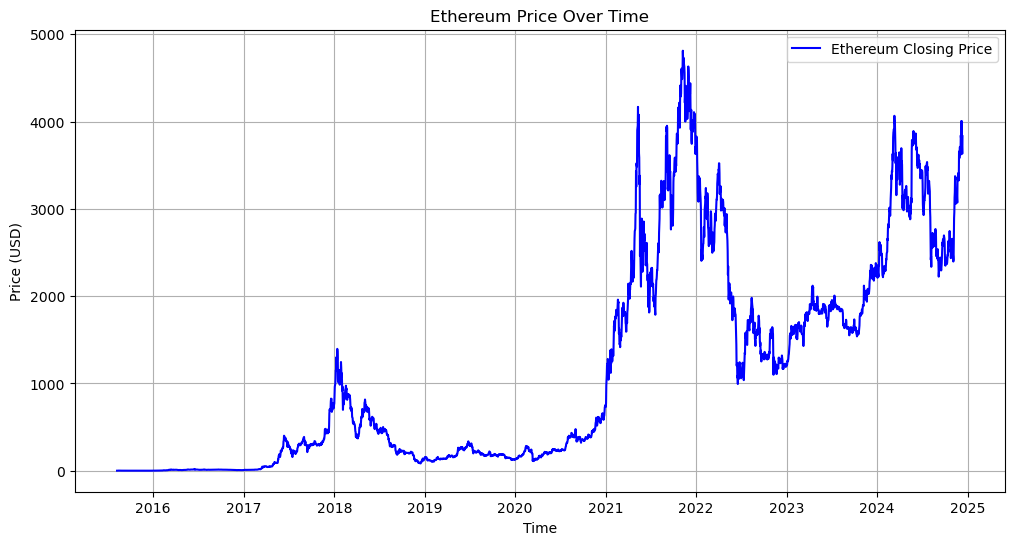

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label="Ethereum Closing Price", color="blue")
plt.title("Ethereum Price Over Time")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

In [25]:
df.describe()

,open,high,low,close,volume,marketCap,month,Day,Day_Of_Week
count,3414.000000,3414.000000,3414.000000,3414.000000,3.414000e+03,3.414000e+03,3414.000000,3414.000000,3414.000000
mean,1135.188481,1166.596569,1101.061839,1136.146111,9.813852e+09,1.335894e+11,6.642648,15.726128,2.999707
std,1220.077118,1252.725112,1184.046534,1220.557058,1.057379e+10,1.467523e+11,3.449269,8.800370,2.000806
min,0.431589,0.482988,0.420897,0.434829,1.021280e+05,3.221363e+07,1.000000,1.000000,0.000000
25%,151.360442,156.891514,147.398606,151.703804,1.351760e+09,1.611421e+10,4.000000,8.000000,1.000000
50%,454.273278,469.536499,437.656509,454.949641,7.237862e+09,4.649538e+10,7.000000,16.000000,3.000000
75%,1899.387549,1937.608539,1865.580534,1899.584327,1.503478e+10,2.274903e+11,10.000000,23.000000,5.000000
max,4810.071533,4891.704698,4718.039256,4812.087614,8.448291e+10,5.690943e+11,12.000000,31.000000,6.000000


# Exponential Moving Average (EMA)

## Définition :
L'**EMA (Exponential Moving Average)** est une moyenne mobile qui accorde **plus de poids aux valeurs récentes**. Elle est plus réactive aux changements des prix que la moyenne mobile simple (**SMA**).

## Formule :
L'EMA est calculée récursivement :

EMA_t = alpha * X_t + (1 - alpha) * EMA_(t-1)

où :
- EMA_t est l'EMA à l'instant t,
- X_t est la valeur actuelle,
- alpha est le facteur de lissage, défini par :

alpha = 2 / (N + 1)

avec N étant la période 

plus N est petit , plus l'EMA réagit rapidement aux variations récentes 


## Interprétation :
- **Réagit rapidement aux variations des prix**.
- **Réduit le bruit tout en capturant les tendances**.
- **Utilisé pour identifier la direction des tendances** et comme **signal** dans les stratégies de trading.


In [27]:
def EMA(Serie, window):
    k = 2 / (window + 1)
    EMA = []
    EMA.append(Serie[0])
    for i in range(1, len(Serie)):
        ema = k * Serie[i] + (1 - k) * EMA[i - 1]
        EMA.append(ema)
    return EMA

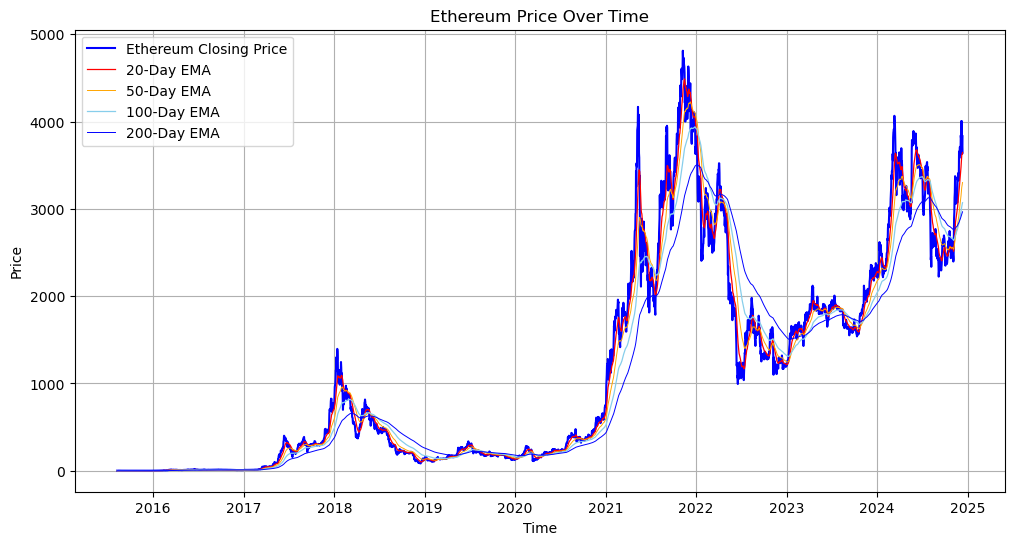

In [29]:
EMA_20 = EMA(df['close'], window = 20)
EMA_50 = EMA(df['close'], window = 50)
EMA_100 = EMA(df['close'], window = 100)
EMA_200 = EMA(df['close'], window = 200)
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label = "Ethereum Closing Price", color="blue")
plt.plot(df.index, EMA_20, label = "20-Day EMA", c = "red", linewidth= 0.9)
plt.plot(df.index, EMA_50, label = "50-Day EMA", c = "orange", linewidth= 0.7)
plt.plot(df.index, EMA_100, label = "100-Day EMA", c = "skyblue", linewidth= 0.9)
plt.plot(df.index, EMA_200, label = "200-Day EMA", c = "blue", linewidth= 0.7)
plt.title("Ethereum Price Over Time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

# 📌Vérification de la Stationnarité

In [31]:
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    if result[1] <= 0.05:
        print("La série est stationnaire")
    else:
        print("La série n'est PAS stationnaire, différenciation nécessaire.")

test_stationarity(df['close'])

ADF Statistic: -1.2003
p-value: 0.6735
La série n'est PAS stationnaire, différenciation nécessaire.


In [33]:
df['close_diff'] = df['close'].diff().dropna()

### Interprétation :
Si p-value < 0.05, la série est stationnaire → ARIMA peut être appliqué directement

Sinon, une différenciation est nécessaire pour stabiliser la tendance.


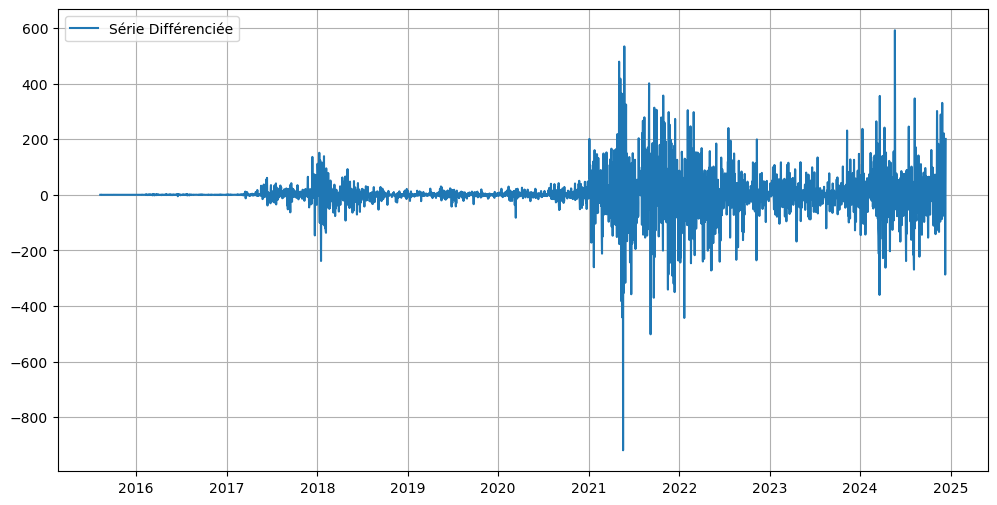

In [35]:
# Visualisation de la série différenciée
plt.figure(figsize=(12, 6))
plt.plot(df['close_diff'], label="Série Différenciée")
plt.legend()
plt.grid()
plt.show()

# 📌Modélisation ARIMA

### Identification des paramètres optimaux

<Figure size 1000x600 with 0 Axes>

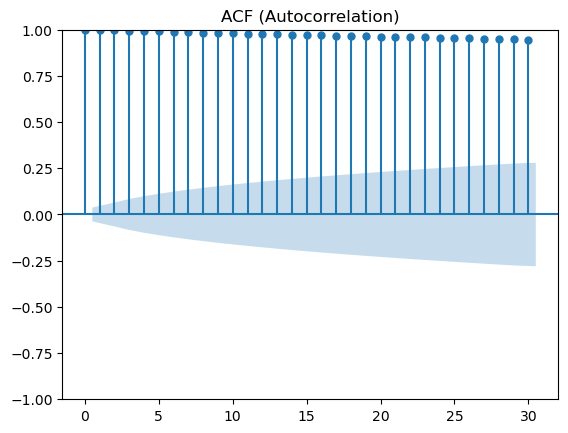

<Figure size 1000x600 with 0 Axes>

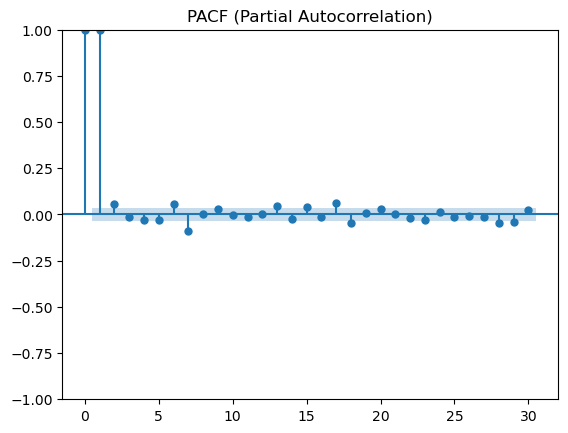

In [37]:
# Séparer les données en train (80%) et test (20%)
train_size = int(len(df['close']) * 0.8)
train, test = df['close'][:train_size], df['close'][train_size:]

# ACF et PACF pour ajuster les paramètres ARIMA
plt.figure(figsize=(10, 6))
plot_acf(train, lags=30, title="ACF (Autocorrelation)")
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(train, lags=30, title="PACF (Partial Autocorrelation)")
plt.show()

In [39]:
# Recherche par grille pour les paramètres ARIMA
def grid_search_arima(train, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            model = ARIMA(train, order=(p, d, q))
            model_fit = model.fit()
            aic = model_fit.aic
            if aic < best_score:
                best_score, best_cfg = aic, (p, d, q)
        except:
            continue
    return best_cfg, best_score

In [41]:
# Définir les plages pour p, d, q
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 5)

best_cfg, best_score = grid_search_arima(train, p_values, d_values, q_values)
print(f"Meilleurs paramètres ARIMA: {best_cfg} avec AIC: {best_score}")

Meilleurs paramètres ARIMA: (1, 1, 4) avec AIC: 30586.34535638227




### Prédictions et évaluation du modèle

In [44]:
# Validation par glissement (Walk Forward Validation)
history = list(train)
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=best_cfg)  # Utilisation des paramètres optimisés
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test.iloc[t])  # Mise à jour avec la vraie valeur

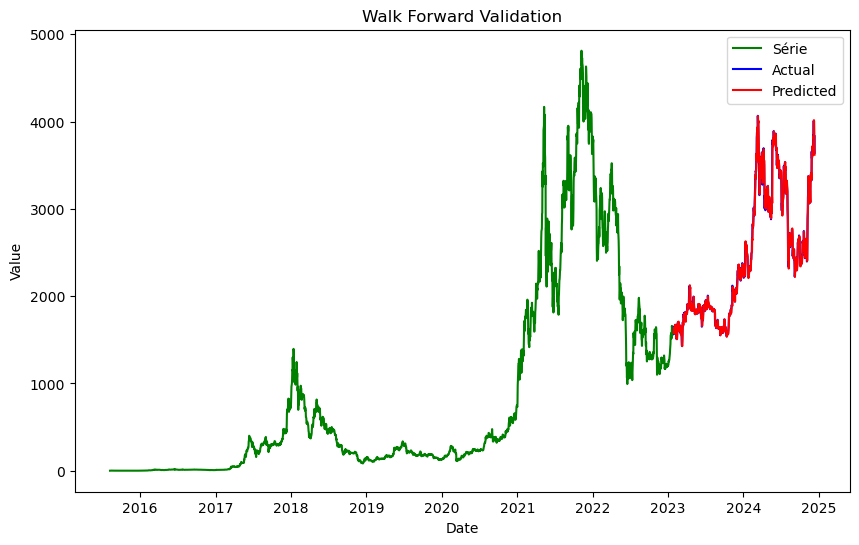

In [46]:
# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
plt.plot(train, label="Série", color="green")
plt.plot(test.index, test, label="Actual", color="blue")
plt.plot(test.index, predictions, label="Predicted", color="red")
plt.title("Walk Forward Validation")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

In [48]:
# Calculer les erreurs
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))
r2 = r2_score(test, predictions)

print(f"Performance du Modèle ARIMA ({best_cfg}):")
print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f'R²: {r2}')


Performance du Modèle ARIMA ((1, 1, 4)):
MAE : 52.34
MSE : 6454.12
RMSE : 80.34
R²: 0.987180969791635


#  📌 Préparation des Données pour ANN, RNN, LSTM et GRU

In [50]:
# Normalisation des données
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['close']])

In [52]:
# Séparation train/test (80% - 20%)
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

In [72]:
# Fonction pour créer des séquences
def create_dataset(data, time_step=12):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Création des séquences pour train/test
X_train, y_train = create_dataset(train)
X_test, y_test = create_dataset(test)

In [74]:
# Reshape pour LSTM/RNN/GRU (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 📌 Modélisation Deep Learning

In [76]:
# Définition des hyperparamètres
EPOCHS = 50
BATCH_SIZE = 16
LEARNING_RATE = 0.0005
DROPOUT_RATE = 0.1

# ANN Model

In [78]:
print("Training ANN Model...")

ann_model = Sequential()
# Couches cachées ANN
ann_model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
ann_model.add(Dropout(DROPOUT_RATE))
ann_model.add(Dense(units=64, activation='relu'))
ann_model.add(Dropout(DROPOUT_RATE))

# Couche de sortie ANN
ann_model.add(Dense(units=1))

# Compilation
ann_model.compile(optimizer=Adam(learning_rate=LEARNING_RATE), loss='mean_squared_error')

# Entraînement du modèle ANN
ann_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Training ANN Model...
Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0049
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1369e-04
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6142e-04
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2950e-04
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3700e-04
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0576e-04
Epoch 10/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6618e-04
Epoch 11/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0500e-04
Epoch 12/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4338e-04
Epoch 13/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4348e-04
Epoch 14/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4325

In [80]:
ann_predictions = ann_model.predict(X_test)
ann_predictions = scaler.inverse_transform(ann_predictions)
y_test_actual_ann = scaler.inverse_transform(y_test.reshape(-1, 1))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


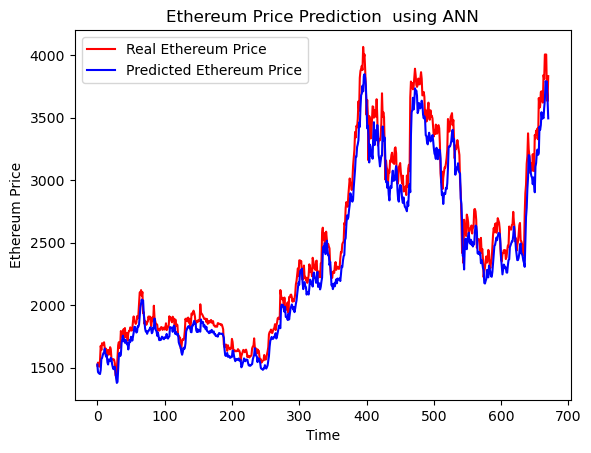

In [82]:
plt.plot(y_test_actual_ann, color = 'red', label = 'Real Ethereum Price')
plt.plot(ann_predictions, color = 'blue', label = 'Predicted Ethereum Price')
plt.title('Ethereum Price Prediction  using ANN')
plt.xlabel('Time')
plt.ylabel('Ethereum Price')
plt.legend()
plt.show()

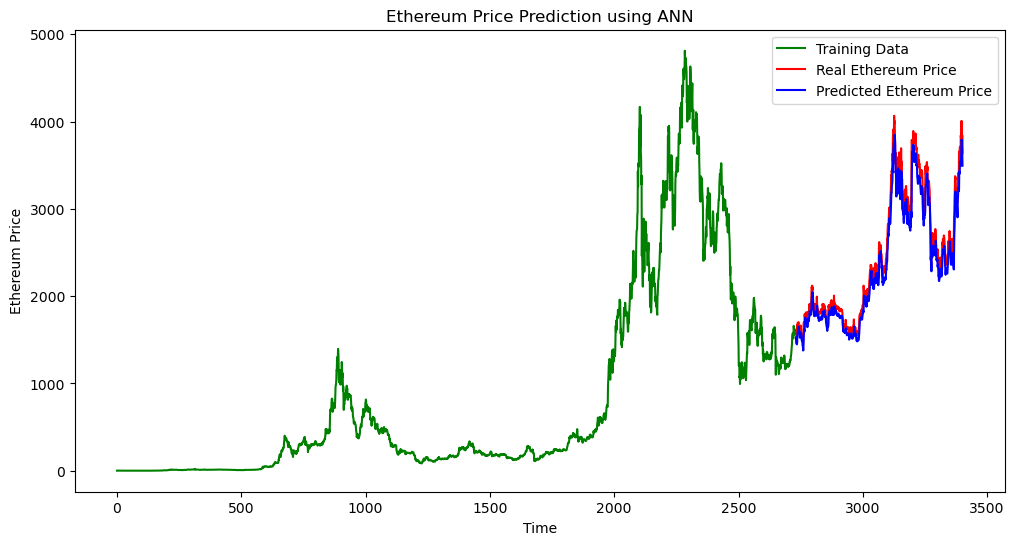

In [84]:
#visualize training, predictions, and test
train_range = range(len(train))
test_range = range(len(train), len(train)+len(y_test))
pred_range = range(len(train), len(train)+len(ann_predictions))

plt.figure(figsize=(12, 6))
plt.plot(train_range, scaler.inverse_transform(train.reshape(-1, 1)), color='green', label='Training Data')
plt.plot(test_range, y_test_actual_ann, color = 'red', label = 'Real Ethereum Price')
plt.plot(pred_range, ann_predictions, color = 'blue', label = 'Predicted Ethereum Price')
plt.title('Ethereum Price Prediction using ANN')
plt.xlabel('Time')
plt.ylabel('Ethereum Price')
plt.legend()
plt.show()

# RNN Model

In [148]:
print("Training RNN Model...")

rnn_model = Sequential()
# Couches cachées RNN
rnn_model.add(SimpleRNN(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dropout(DROPOUT_RATE))
rnn_model.add(SimpleRNN(units=64, return_sequences=False))
rnn_model.add(Dropout(DROPOUT_RATE))

# Couche de sortie RNN
rnn_model.add(Dense(units=1))

# Compilation
rnn_model.compile(optimizer=Adam(learning_rate=LEARNING_RATE), loss='mean_squared_error')

# Entraînement du modèle RNN
rnn_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)


Training RNN Model...
Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0271
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0043
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0020
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0015
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0014
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0010
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.8357e-04
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0011
Epoch 10/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.9866e-04
Epoch 11/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.4013e-04
Epoch 12/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.4519e-04
Epoch 13/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.3223e-04
Epoch 14/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.8383e-04
Epoch 15/50

In [150]:
rnn_predictions = rnn_model.predict(X_test)
rnn_predictions = scaler.inverse_transform(rnn_predictions)
y_test_actual_rnn = scaler.inverse_transform(y_test.reshape(-1, 1))

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


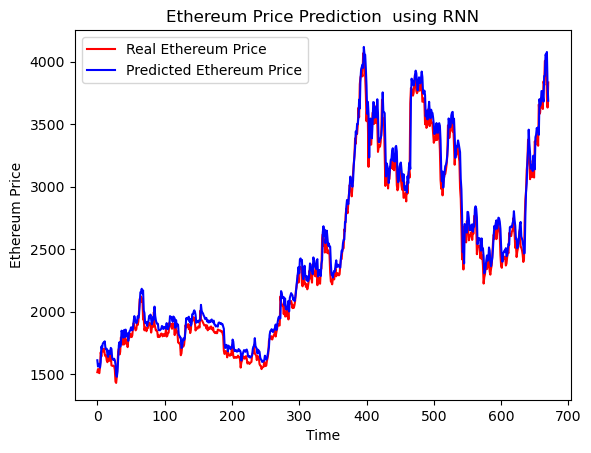

In [152]:
plt.plot(y_test_actual_rnn, color = 'red', label = 'Real Ethereum Price')
plt.plot(rnn_predictions, color = 'blue', label = 'Predicted Ethereum Price')
plt.title('Ethereum Price Prediction  using RNN')
plt.xlabel('Time')
plt.ylabel('Ethereum Price')
plt.legend()
plt.show()

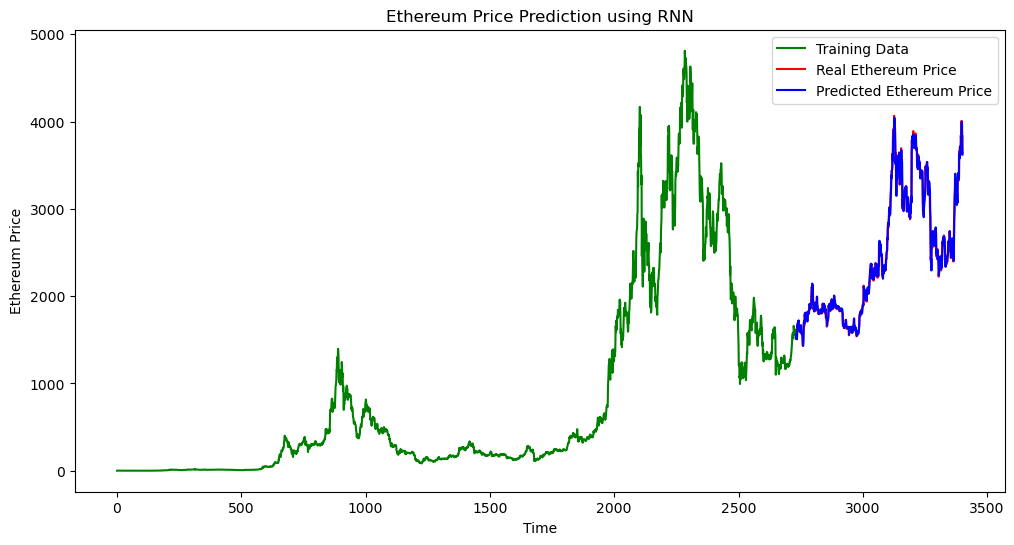

In [136]:
#visualize training, predictions, and test
train_range = range(len(train))
test_range = range(len(train), len(train)+len(y_test))
pred_range = range(len(train), len(train)+len(rnn_predictions))

plt.figure(figsize=(12, 6))
plt.plot(train_range, scaler.inverse_transform(train.reshape(-1, 1)), color='green', label='Training Data')
plt.plot(test_range, y_test_actual_rnn, color = 'red', label = 'Real Ethereum Price')
plt.plot(pred_range, rnn_predictions, color = 'blue', label = 'Predicted Ethereum Price')
plt.title('Ethereum Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Ethereum Price')
plt.legend()
plt.show()

# LSTM Model

In [172]:
print("Training LSTM Model...")

lstm_model = Sequential()
# Couches cachées LSTM
lstm_model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(DROPOUT_RATE))
lstm_model.add(LSTM(units=64, return_sequences=False))
lstm_model.add(Dropout(DROPOUT_RATE))

# Couche de sortie LSTM
lstm_model.add(Dense(units=1))

# Compilation
lstm_model.compile(optimizer=Adam(learning_rate=LEARNING_RATE), loss='mean_squared_error')

# Entraînement du modèle LSTM
lstm_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Training LSTM Model...
Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0151
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.6680e-04
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.4166e-04
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0010
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.4474e-04
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.4356e-04
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.4416e-04
Epoch 10/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 7.9984e-04
Epoch 11/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 8.9120e-04
Epoch 12/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 6.3326e-04
Epoch 13/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.6058e-04
Epoch 14/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.90

In [174]:
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_actual_lstm = scaler.inverse_transform(y_test.reshape(-1, 1))

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


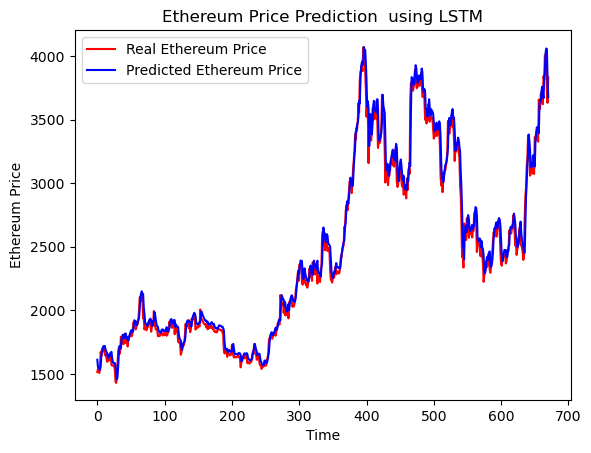

In [176]:
plt.plot(y_test_actual_lstm, color = 'red', label = 'Real Ethereum Price')
plt.plot(lstm_predictions, color = 'blue', label = 'Predicted Ethereum Price')
plt.title('Ethereum Price Prediction  using LSTM')
plt.xlabel('Time')
plt.ylabel('Ethereum Price')
plt.legend()
plt.show()

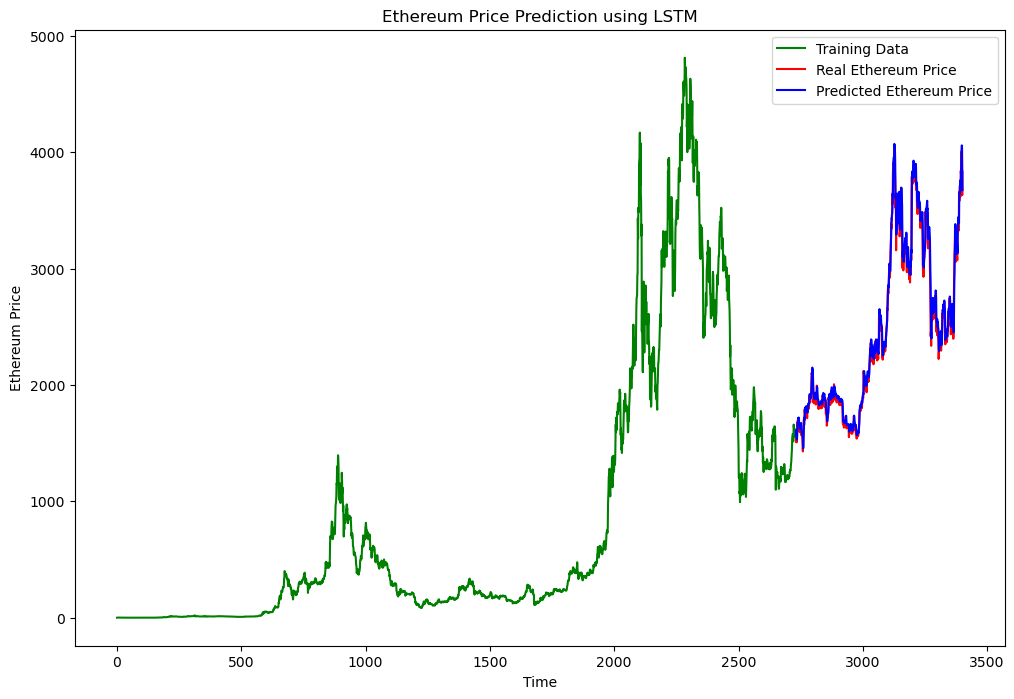

In [178]:
#visualize training, predictions, and test
train_range = range(len(train))
test_range = range(len(train), len(train)+len(y_test))
pred_range = range(len(train), len(train)+len(lstm_predictions))

plt.figure(figsize=(12, 8))
plt.plot(train_range, scaler.inverse_transform(train.reshape(-1, 1)), color='green', label='Training Data')
plt.plot(test_range, y_test_actual_lstm, color = 'red', label = 'Real Ethereum Price')
plt.plot(pred_range, lstm_predictions, color = 'blue', label = 'Predicted Ethereum Price')
plt.title('Ethereum Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Ethereum Price')
plt.legend()
plt.show()

# GRU Model

In [198]:
print("Training GRU Model...")

gru_model = Sequential()
# Couches cachées GRU
gru_model.add(GRU(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(DROPOUT_RATE))
gru_model.add(GRU(units=64, return_sequences=False))
gru_model.add(Dropout(DROPOUT_RATE))

# Couche de sortie GRU
gru_model.add(Dense(units=1))

# Compilation
gru_model.compile(optimizer=Adam(learning_rate=LEARNING_RATE), loss='mean_squared_error')

# Entraînement du modèle GRU
gru_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)


Training GRU Model...
Epoch 1/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0077
Epoch 2/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 8.1058e-04
Epoch 3/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 6.9731e-04
Epoch 4/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 6.4158e-04
Epoch 5/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5.6505e-04
Epoch 6/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 8.0663e-04
Epoch 7/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5.3000e-04
Epoch 8/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 4.9667e-04
Epoch 9/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 5.4817e-04
Epoch 10/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5.6091e-04
Epoch 11/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5.0909e-04
Epoch 12/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4.5555e-04
Epoch 13/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.6320e-04
Epoch 14/50
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 1

In [200]:
gru_predictions = gru_model.predict(X_test)
gru_predictions = scaler.inverse_transform(gru_predictions)
y_test_actual_gru = scaler.inverse_transform(y_test.reshape(-1, 1))

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


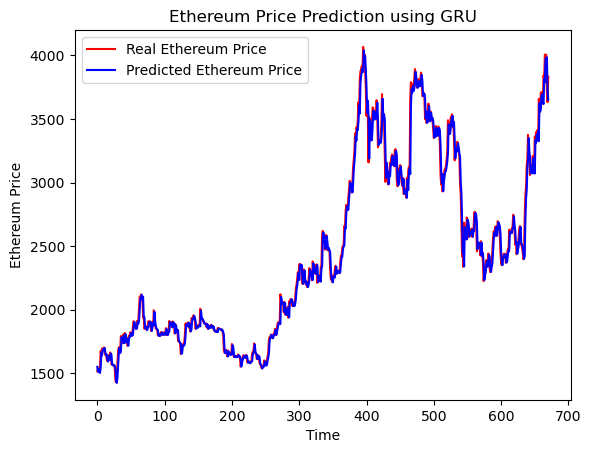

In [208]:
plt.plot(y_test_actual_gru, color = 'red', label = 'Real Ethereum Price')
plt.plot(gru_predictions, color = 'blue', label = 'Predicted Ethereum Price')
plt.title('Ethereum Price Prediction using GRU')
plt.xlabel('Time')
plt.ylabel('Ethereum Price')
plt.legend()
plt.show()

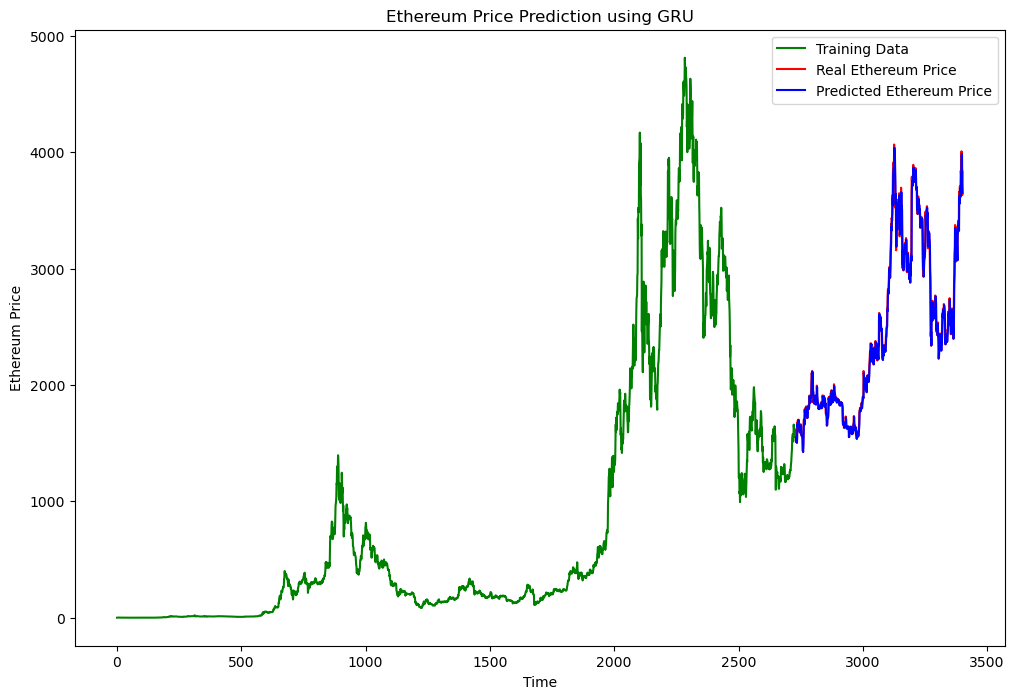

In [204]:
#visualize training, predictions, and test
train_range = range(len(train))
test_range = range(len(train), len(train)+len(y_test))
pred_range = range(len(train), len(train)+len(gru_predictions))

plt.figure(figsize=(12, 8))
plt.plot(train_range, scaler.inverse_transform(train.reshape(-1, 1)), color='green', label='Training Data')
plt.plot(test_range, y_test_actual_gru, color = 'red', label = 'Real Ethereum Price')
plt.plot(pred_range, gru_predictions, color = 'blue', label = 'Predicted Ethereum Price')
plt.title('Ethereum Price Prediction using GRU')
plt.xlabel('Time')
plt.ylabel('Ethereum Price')
plt.legend()
plt.show()

In [206]:
# Calcul des scores (MAE, MSE, RMSE, R²)
def print_scores(y_real, predictions):
    mae = mean_absolute_error(y_real, predictions)
    mse = mean_squared_error(y_real, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_real, predictions)
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R²: {r2}')

print("Scores for ANN:")
print_scores(y_test_actual_ann, ann_predictions)

print("\nScores for RNN:")
print_scores(y_test_actual_rnn, rnn_predictions)

print("\nScores for LSTM:")
print_scores(y_test_actual_lstm, lstm_predictions)

print("\nScores for GRU:")
print_scores(y_test_actual_gru, gru_predictions)

Scores for ANN:
MAE: 118.6515438378825
MSE: 21177.876936406534
RMSE: 145.5262070432901
R²: 0.9577135542557464

Scores for RNN:
MAE: 76.15010005433558
MSE: 9732.979861610793
RMSE: 98.65586582464721
R²: 0.9805658930739942

Scores for LSTM:
MAE: 62.304899943966376
MSE: 7878.057687104753
RMSE: 88.75842318960355
R²: 0.9842696668813309

Scores for GRU:
MAE: 52.55595571603928
MSE: 6565.879458538587
RMSE: 81.03011451638574
R²: 0.9868897290167221
